# Data Analysis and Data Science
## Putting it all together 

By: Caroline Labelle
<br>For: BIM6065-C

<br>
Date: July 8th, 2024

<hr style="border:1px solid black"> </hr>

In [1]:
### Student Name: Thomas Perreault
print("Thomas Perreault")

Thomas Perreault


Complete the following exercises and push your notebook on Github: submit your Github handle on StudiUM.

In a terminal : 

1. Go in the same directory as your notebook: `cd path_to_your_notebook/`
2. Commit the change made to your notebook: `git commit -am "add_your_personalized_note"`
3. Push your commit on Github: `git push origin main`

Go to Github and double check that the pushed Notebook is the version you want to hand in.

In [2]:
### Import sklearn
import sklearn.decomposition, sklearn.cluster

### Import scipy
import scipy as sp

### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
sns.set(rc={'figure.figsize':(4, 2)})
sns.set_theme(context="notebook", style="white")

# Breast Cancer Subtypes Analysis [50 pts]

You are given a gene expression dataset of $N$ breast cancer patients with their clinical subtype. You wish to know if you can assess the clinical subtypes based on the gene expression. To do so you will be using various methods presented through out the class.

## Import the data [10 pts]

Your dataset concist of three files: 
1. `genes_id.txt`
2. `patient_subtype.txt`
3. `patient_expression.txt`. 

Import the various files and build your dataset daframe. You should have for each patient her/his gene expression profil and clinical subtypes. Use the gene IDs as identifier for the columns or row names (you choose how to build your dataframe).

### Import the files individually [3 pts]

In [4]:
file2 =open("/u/perreaut/patient_subtype.txt")
file_subtype = pd.read_csv(file2, header=None)
print(file_subtype) 

file3 =open("/u/perreaut/genes_id.txt")
file_genes = pd.read_csv(file3, header=None)
print(file_genes)

file4 ="/u/perreaut/patient_expression.txt"
df = pd.read_csv(file4, header=None, sep =" ")

df

          0
0     Basal
1     Basal
2     Basal
3     Basal
4     Basal
..      ...
640  Normal
641  Normal
642  Normal
643  Normal
644  Normal

[645 rows x 1 columns]
                     0
0    ENSG00000011426.9
1    ENSG00000054598.6
2   ENSG00000062038.12
3    ENSG00000077152.8
4   ENSG00000082175.13
5   ENSG00000089685.13
6   ENSG00000091831.20
7   ENSG00000092621.10
8    ENSG00000094804.8
9    ENSG00000099953.8
10  ENSG00000101057.14
11  ENSG00000104332.10
12  ENSG00000105173.12
13   ENSG00000106605.9
14  ENSG00000107262.15
15  ENSG00000115648.12
16  ENSG00000117399.12
17  ENSG00000117724.11
18  ENSG00000128422.14
19   ENSG00000129514.5
20  ENSG00000133627.16
21  ENSG00000134057.13
22  ENSG00000135679.20
23  ENSG00000136997.13
24  ENSG00000138180.14
25  ENSG00000141424.11
26  ENSG00000141736.12
27  ENSG00000141738.12
28  ENSG00000142945.11
29  ENSG00000146648.14
30  ENSG00000148773.11
31   ENSG00000151715.6
32  ENSG00000160867.13
33  ENSG00000164611.11
34   ENSG00000165304.6
35  

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,0.415417,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.035764,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,1.123048,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,0.930984,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,1.975961,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,0.820838,2.418684,3.460263,1.714065,2.574779,1.158088,2.099645,2.689138,0.705885,3.340791,...,2.522965,1.112896,2.147804,0.498596,1.633678,1.791459,5.193883,5.470001,2.507121,2.424799
641,1.666605,1.818016,2.965531,3.398361,1.131149,2.243665,2.103245,3.090764,1.380203,4.770786,...,1.989089,2.517961,1.820856,1.147327,3.336830,2.926771,4.834529,5.614588,1.520555,2.128657
642,0.810583,2.097097,3.595351,1.667315,0.563232,1.041924,1.894974,1.950360,1.017512,3.408128,...,1.953431,1.019320,1.837105,0.575619,1.638372,1.749170,5.413128,5.591127,2.129137,1.244375
643,1.153391,0.935530,2.415240,2.179527,0.183943,1.688365,0.297845,2.814779,0.754930,4.585375,...,0.820314,2.377948,2.120787,0.626063,2.161975,1.224772,3.553468,3.305371,1.386436,0.515823


### How many patient are you considering? [1 pt]

In [5]:
print(len(file_subtype), "patients")

645 patients


### How many genes are you considering? [1 pt]

In [6]:
print(len(file_genes), "genes")

47 genes


### Combine the data from all three files into one dataframe [5 pts]
You can use one of the dataframe as the 'main' one, and then rename its columns and add a new column.

**Show a preview/overview of your dataframe**

In [7]:
df.columns = file_genes

In [8]:
df.columns = file_genes[0]
df.loc[:, "Clinical_subtype"] = file_subtype[0]
df.head()

,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5,Clinical_subtype
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720,Basal
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090,Basal
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836,Basal
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472,Basal
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927,Basal


## Explore the dataset [15 pts]

### How many subtypes are you considering? [1 pts]

In [9]:
print("Number of subtypes: ", df.Clinical_subtype.nunique())

Number of subtypes:  5


### How many patients are associtated to each subtype? [2 pts]

In [10]:
print(df.Clinical_subtype.unique())

['Basal' 'LumA' 'LumB' 'Her2' 'Normal']


In [11]:
print("Patients associated to Basal:", len(df.loc[df.Clinical_subtype == "Basal", "ENSG00000011426.9"]))
print("Patients associated to LumA:", len(df.loc[df.Clinical_subtype == "LumA", "ENSG00000011426.9"]))
print("Patients associated to LumB:", len(df.loc[df.Clinical_subtype == "LumB", "ENSG00000011426.9"]))
print("Patients associated to Her2:", len(df.loc[df.Clinical_subtype == "Her2", "ENSG00000011426.9"]))
print("Patients associated to Normal:", len(df.loc[df.Clinical_subtype == "Normal", "ENSG00000011426.9"]))

Patients associated to Basal: 191
Patients associated to LumA: 179
Patients associated to LumB: 165
Patients associated to Her2: 82
Patients associated to Normal: 28


### Generate a graph showing the distribution of the average expression of each gene [5 pts]

average expression of genes


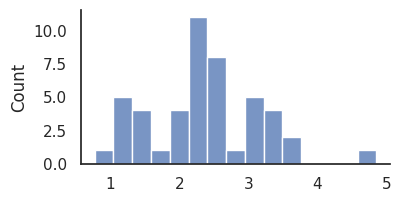

In [12]:
sns.histplot(df.loc[:, df.columns.values[0:47]].mean(), bins=15)
sns.despine()
print("average expression of genes")

### What are the two genes with the largest standard deviation for all patient? [2 pts]
To answer this question, you can use the `df.std()` and `df.sort_values()`. You can look into the doc for more informations on these two functions.
1. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html
2. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values

In [13]:
#df_test = np.std(df.columns.values[0:47])

df_std = df.iloc[:,0:47].std(axis=0)
df_std.sort_values(ascending=False).head(2).index

Index(['ENSG00000186081.10', 'ENSG00000128422.14'], dtype='object', name=0)

ENSG00000186081.10### Compare the expression of these two genes: are they corrolated based on tumor subtypes? [5 pts]
The two genes to consider are **ENSG00000186081.10** and **ENSG00000128422.14**.

To answer this question: 
1. Make a figure showing the correlation between the two genes by clinical subtypes,
2. Calculate a correlation coefficient for each comparison and,
3. Briefly interpret your results (make sure your interpretation is consistent with the correlation coefficient used).

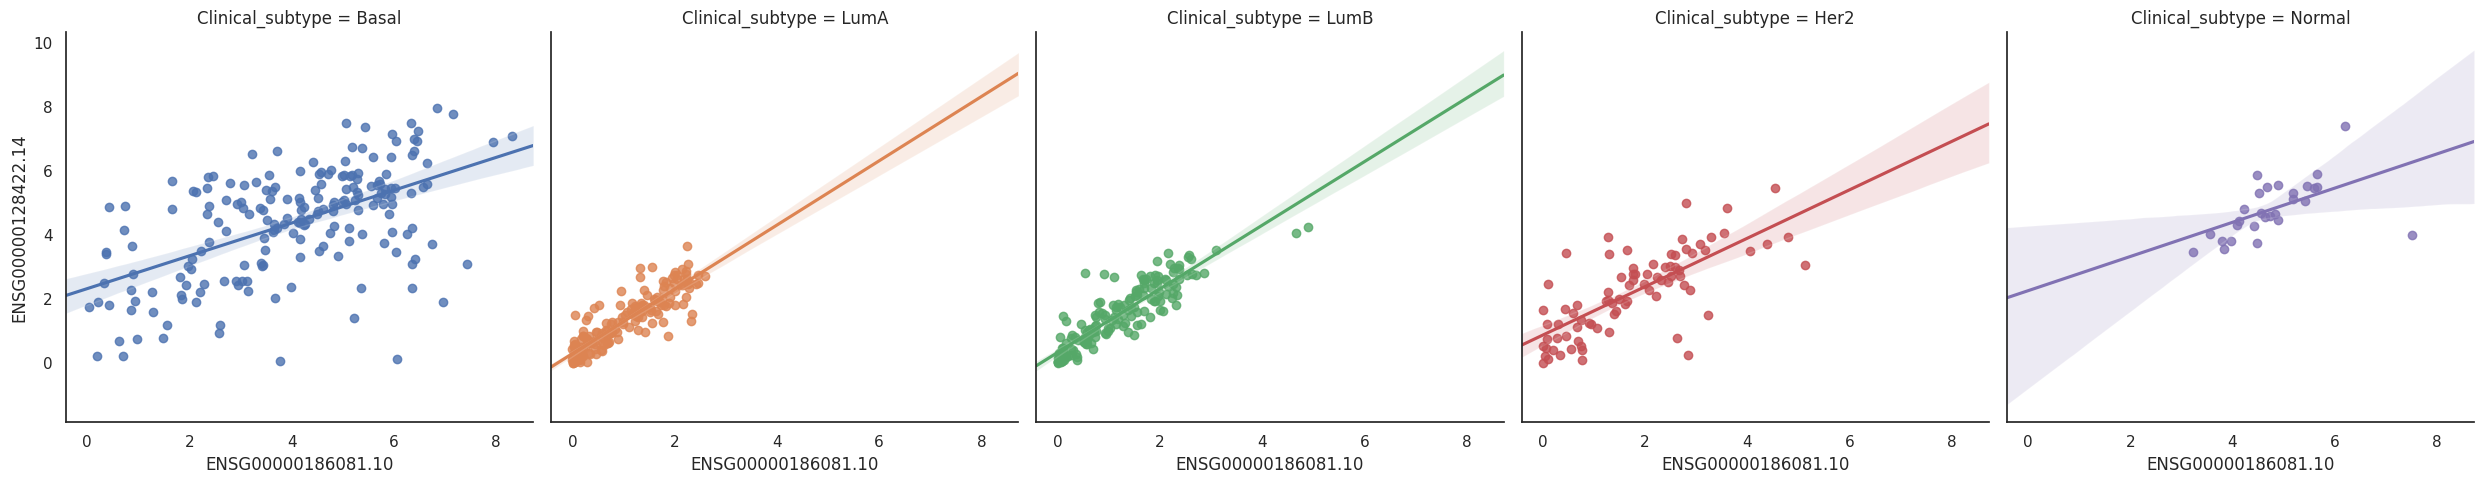

In [14]:
#plot
p = sns.lmplot(data=df, x="ENSG00000186081.10", y="ENSG00000128422.14", truncate=False, col="Clinical_subtype", hue="Clinical_subtype")
sns.despine()


In [15]:
#coeff
def PearV(a):
    return sp.stats.linregress(x=df.loc[df.Clinical_subtype == a ,"ENSG00000186081.10"] , y=df.loc[df.Clinical_subtype == a ,"ENSG00000128422.14"], alternative="two-sided").rvalue

print("Pearson linear correlation coefficient")
print("Basal subtype: ", np.round(PearV("Basal"), 4))
print("LumA subtype: ", np.round(PearV("LumA"), 4))
print("LumB subtype: ", np.round(PearV("LumB"), 4))
print("Her2 subtype: ", np.round(PearV("Her2"), 4))
print("Normal subtype: ", np.round(PearV("Normal"), 4))

Pearson linear correlation coefficient
Basal subtype:  0.5544
LumA subtype:  0.8914
LumB subtype:  0.8974
Her2 subtype:  0.7363
Normal subtype:  0.5351


In [16]:
#interpretation
print("Interpretation : ")
print("The expression of ENSG00000186081.10 is strongly linearly correlated to ENSG00000128422.14 expression")
print("in samples from clinical subtype LumA and LumB. The linear correlation between the expression of those")
print("two genes is still present in other subtypes but with a weaker correlation, with subtypes Basal and Normal")
print("having the lowest linear correlation for those genes.") 

Interpretation : 
The expression of ENSG00000186081.10 is strongly linearly correlated to ENSG00000128422.14 expression
in samples from clinical subtype LumA and LumB. The linear correlation between the expression of those
two genes is still present in other subtypes but with a weaker correlation, with subtypes Basal and Normal
having the lowest linear correlation for those genes.


## Clustering [25 pts]
You are wondering if the M genes considered by your dataset are enough to cluster the N patients by their cancer subtype. To answer this question, you first want to apply a dimensionality reduction algorithm to your dataset. You then want to apply a clustering alogirthme to the reduced components, and compare the clustering labels to the clinical subtype of each patient.

### Apply a PCA Dimensionality reduction to your gene expression dataset [4 pts]

Once you selected the numerical gene expression, scale the value and initiate a PCA object. You want to reduce your set of features to **25 components**.

In [17]:
subset_PCA = df.iloc[:, 0:47]
subset_PCA.head()

scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(subset_PCA)


subset_scaled = scaler.transform(subset_PCA) 

pca = sklearn.decomposition.PCA(n_components=25)
pca.fit(subset_scaled)

PCA(n_components=25)

### What percentage of the variance of the dataset is explained by the two first component? [2 pt]

In [18]:
print(np.round(sum(pca.explained_variance_ratio_[0:2])*100, 4), "% of the variance is explained by the first two components")


57.5464 % of the variance is explained by the first two components


### Apply the PCA onto your gene expression data and create a DataFrame with the PCs and the clinical patient subtypes [4 pts]
**Show a preview/overview of your dataframe**

In [19]:
pca_reduce = pca.fit_transform(subset_scaled)

data_reduce = pd.DataFrame(pca_reduce) 
data_reduce.loc[:, "Clinical_subtype"] = df.Clinical_subtype

data_reduce.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,Clinical_subtype
0,5.445487,2.428348,0.994181,3.234351,0.581775,0.503669,-1.314576,1.770997,-1.192583,-0.811812,...,-1.875858,0.426612,0.114464,-0.851402,1.109125,0.041479,0.916238,0.283359,1.411175,Basal
1,5.413304,2.726559,-0.916842,0.937050,-1.994252,0.303562,-0.123579,-0.860660,-0.201094,0.128108,...,0.501419,-0.084159,0.432827,0.036273,-0.020044,-0.211830,-0.521534,0.355593,-0.205031,Basal
2,8.407711,0.419360,-2.059230,-0.792823,-1.954798,-0.389237,0.139329,0.366723,-0.093978,0.865002,...,-0.397783,0.131195,-0.107449,0.023024,-0.212187,0.308241,-0.325319,0.193784,0.278587,Basal
3,7.328172,0.176822,-0.737810,2.308405,-1.091921,-0.587628,-0.933543,0.759118,-0.101877,-0.162309,...,-0.469685,-0.240287,0.302134,-0.237978,0.268315,-0.380987,-0.429954,0.023508,0.039688,Basal
4,3.819484,2.102397,-2.357337,-6.491174,-0.157028,-1.487336,-1.577103,1.635241,-0.133013,-0.757461,...,-0.835880,0.055895,-2.013600,0.320591,1.559804,0.849584,-0.104835,0.746528,0.459466,Basal


### Plot a figure showing the two first PCs and color the samples by their clinical subtype [3 pts]
Do you think the k-means algorithm will be able to accurately cluster patients based on their clinical subtype? Why?

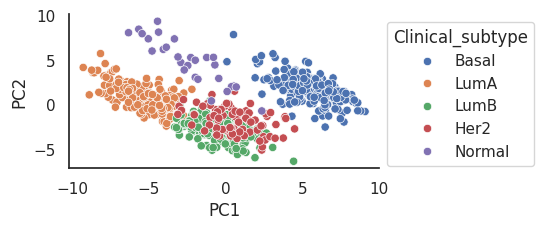

In [20]:
pc2 = sns.scatterplot(data_reduce, x=0, y=1, hue="Clinical_subtype")

pc2.set_xlabel('PC1')
pc2.set_ylabel('PC2')
sns.move_legend(pc2, "upper left", bbox_to_anchor=(1,1))
sns.despine()

In [21]:
#interpretation
print("I don't think that the k-means algorithm is gonna be able to accurately cluster patients in each subtype because the subtypes Her2 and LumB clusters are superimposed. The other subtypes should be clustered accurately, except Normal which might be slightly mixed with the Her2/LumB and the Basal clusters")


I don't think that the k-means algorithm is gonna be able to accurately cluster patients in each subtype because the subtypes Her2 and LumB clusters are superimposed. The other subtypes should be clustered accurately, except Normal which might be slightly mixed with the Her2/LumB and the Basal clusters


### Apply the K-means algorithme to your reduced dataset [5 pts]
When applying the K-means, you should use all 25 PCs, generated by your PCA. Add the k-means labels to your reduced dataset.

In [22]:
### Initiate the k-means algorithm
### How many cluster should we use?
kmean_algo = sklearn.cluster.KMeans(n_clusters=5, n_init="auto")
subset_KM = data_reduce.iloc[:, 0:25]
subset_KM.head()
### Apply kmeans to our data
kmeans_subset = kmean_algo.fit(subset_KM)

### Get centroids coordinate
kmeans_subset.cluster_centers_
#change the order of col vs index with transpose
cent_by_axes = kmeans_subset.cluster_centers_.T

### Get datapoints labels
kmeans_subset.labels_

### Compare the kmean labels and the true grouping values (Results)
### Add two new coumns with the different grouping to our subset_KM
subset_KM.loc[:, "Clinical_subtype"] = df.Clinical_subtype
subset_KM.loc[:, "kmeans_labels"] = kmeans_subset.labels_

subset_KM.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,Clinical_subtype,kmeans_labels
0,5.445487,2.428348,0.994181,3.234351,0.581775,0.503669,-1.314576,1.770997,-1.192583,-0.811812,...,0.426612,0.114464,-0.851402,1.109125,0.041479,0.916238,0.283359,1.411175,Basal,1
1,5.413304,2.726559,-0.916842,0.937050,-1.994252,0.303562,-0.123579,-0.860660,-0.201094,0.128108,...,-0.084159,0.432827,0.036273,-0.020044,-0.211830,-0.521534,0.355593,-0.205031,Basal,1
2,8.407711,0.419360,-2.059230,-0.792823,-1.954798,-0.389237,0.139329,0.366723,-0.093978,0.865002,...,0.131195,-0.107449,0.023024,-0.212187,0.308241,-0.325319,0.193784,0.278587,Basal,4
3,7.328172,0.176822,-0.737810,2.308405,-1.091921,-0.587628,-0.933543,0.759118,-0.101877,-0.162309,...,-0.240287,0.302134,-0.237978,0.268315,-0.380987,-0.429954,0.023508,0.039688,Basal,4
4,3.819484,2.102397,-2.357337,-6.491174,-0.157028,-1.487336,-1.577103,1.635241,-0.133013,-0.757461,...,0.055895,-2.013600,0.320591,1.559804,0.849584,-0.104835,0.746528,0.459466,Basal,4


### What value of k did you use and why? [2 pt]

I decided to use a k value of 5 both because biologically that's the number of cluster that we are expecting and because
a k value of 5 seems to me like the ideal value to get a low inertia (see graph) without overclustering our data


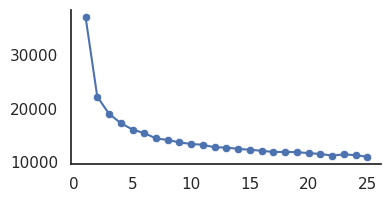

In [27]:
### Run kmeans for various k values
### initiate empty list
inertia_list = []

X = df.iloc[:, 0:47]


### Create for loop for K from 1 to 25
for k in range(1, 26) :
    kmean = sklearn.cluster.KMeans(n_clusters=k, n_init="auto")
    kmeans_X = kmean.fit(X)
    
    ## Add the inertia to the list
    inertia_list += [kmeans_X.inertia_]
    
### Plot K vs. intertia
sns.lineplot(x=np.arange(1, 26), y=inertia_list)
sns.scatterplot(x=np.arange(1, 26), y=inertia_list)
sns.despine()

print("I decided to use a k value of 5 both because biologically that's the number of cluster that we are expecting and because")
print("a k value of 5 seems to me like the ideal value to get a low inertia (see graph) without overclustering our data")


### Compare your k-means labels to the clinical substypes [5 pts]
You comparison can by qualitative and/or quantitative.

**Are you able to cluster patient by clinical substypes from your subset of gene expressions? Briefly describe and interpret your results.**

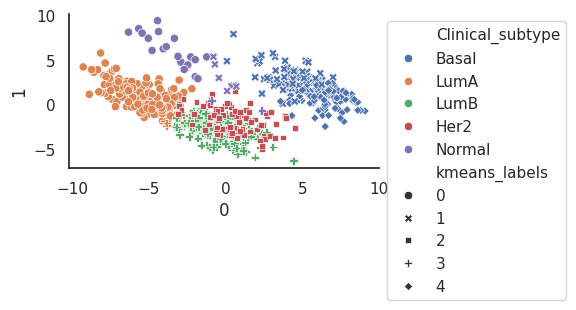

In [24]:
pc3 = sns.scatterplot(subset_KM, x=0, y=1, hue="Clinical_subtype",style="kmeans_labels")
sns.move_legend(pc3, "upper left", bbox_to_anchor=(1,1))
sns.despine()

In [25]:
#Interpretations:
print("Overall the patients can be clustered quite accurately by clinical subtype from the gene expression data. Unlike i thought, the Her2 and the LumB subtypes are rather cleanly clustered. The Normal subtype cluster does indeed mix with other subtypes: LumB a little and, surprisingly, LumA. LumA is the subtype that is the least well defined by the clustering since it is comprised of two different clusters")



Overall the patients can be clustered quite accurately by clinical subtype from the gene expression data. Unlike i thought, the Her2 and the LumB subtypes are rather cleanly clustered. The Normal subtype cluster does indeed mix with other subtypes: LumB a little and, surprisingly, LumA. LumA is the subtype that is the least well defined by the clustering since it is comprised of two different clusters


In [26]:
#PUSH TO GIT HUB!!!!